In [2]:
"""連続型確率変数"""
#離散型確率変数と連続型確率変数の主な違いは、取り得る値が離散的か連続的かという点である。連続型確率変数の場合、計算過程に積分が含まれるなど離散型に比べると少し数式がややこしくなる。

#NumpyとMatplotlibをインポート
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

#積分はSciPyのintegralモジュールを用いて実装していく。integralの計算に、結果に問題はないもののwarningが出る処理が含まれるため、あらかじめwarningを抑制しておく
from scipy import integrate
import warnings

#積分に関するwarningを出力しないようにする。
warnings.filterwarnings('ignore', category=integrate.IntegrationWarning)

In [3]:
"""1次元の連続型確率変数"""
#連続型確率変数とは、取り得る値が連続的な確率変数のことである。
#例えば、ルーレットを考える。ルーレットは円周の長さが1でルーレットが止まった位置までの始点から計測した弧の長さを実現値とする。つまり、このルーレットの取り得る値は0から1の間の実数である。そしてこのルーレットは、前出のいかさまサイコロと同様に、大きい数程出やすくなるいかさまが仕組まれている。
#ところで、このルーレットが0.5という値を取る確率は0になる。なぜならば、このルーレットがぴったりと0.500000…となることはあり得ないからである。
#このように連続型確率変数の場合、確率変数がある特定の値を取るときの確率を定義するという方法では、いずれも確率が0になってしまいうまくいかない。そのため連続型確率変数では確率変数がある区間に入る確率を定義する。
#この場合のルーレットであれば、ルーレットが0.4から0.6の間の値を出す確率は0.2といったように定義される。

"""1次元の連続型確率変数の定義"""
#確率密度関数
#離散型確率変数は取り得る値の（離散的な）集合と確率関数によって定義できた。連続型確率変数も本質的には同様であるが、数式の表現が少し異なり、取り得る値は区間[a,b]で定義され、確率は確率密度関数(PDF),または単に密度関数と呼ばれるf(x)によって定義される。
#密度関数は確率関数に近いものであるが、
    #f(x)=P(X=x)
#とはならないことに注意する。連続型確率変数はある値を取る確率といった定義ではうまくいかない。
#密度関数による確率は、確率変数Xがx0<X<x1の区間に入る確率p(x0<X<x1)で定義され、x0<X<x1の範囲で密度関数f(x)の定積分で計算される。
#この積分は密度関数f(x)とx軸、そして2直線x=x0, x=x1に囲まれた領域の面積と解釈することができる。

#いかさまルーレットを例にしてPythonで実装していく。まず最初に取り得る値の区間の下限と上限をx_rangeとして定義する。

x_range = np.array([0, 1])

In [4]:
#次にx_rangeを定義域とする密度関数を実装する。いかさまルーレットは大きい値ほど出やすいので、次のような密度関数にする。2xなのは確率の性質を満たすためで、このことは後で確認する
    #f(x)=2x (0<x<1)  f(x)=0

def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [5]:
#このx_rangeとfのセットが確率分布で、これによって確率変数Xの振る舞いが決まる。そのためXはx_rangeとfを要素に持つリストとして実装する。

X = [x_range, f]

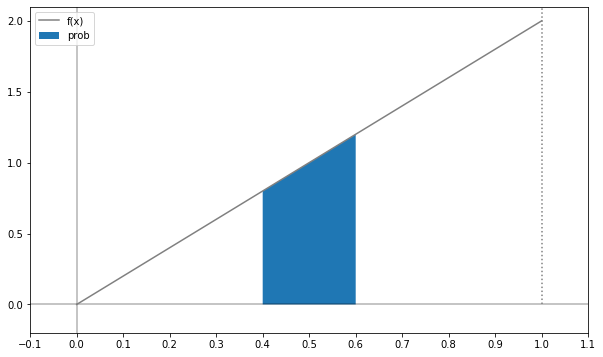

In [7]:
#これで確率変数Xが定義できた。密度関数f(x)を図示する。ここでは確率のイメージがつきやすいよう、f(x)とx軸、そして2直線x=0.4, x=0.6に囲まれた領域を塗りつぶしている。この領域の面積が、いかさまルーレットが0.4から0.6の間を取る確率になっている。

xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

#0.4から0.6のx座標を用意
xs = np.linspace(0.4, 0.6, 100)
#xsの範囲でf(x)とx軸に囲まれた領域を塗りつぶす
ax.fill_between(xs, [f(x) for x in xs], label='prob')
ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [8]:
#囲まれた領域の面積は、積分で求めることができる。この積分はintegrateのquad関数を使って、次のように求めることができる。quad関数は返り値として、積分値と推定誤差が返る。

#第1引数が被積分関数、第2引数と第3引数が積分区間
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

In [9]:
#確率の性質
#連続型確率変数では確率の性質として次の2つの条件を満たす必要がある。
    #f(x)>0
    #無限大範囲の密度関数f(x)の積分値=1
#1つめのf(x)が0以上の値を取るという性質は、確率が面積を表すので明らかである。Pythonで確かめる場合にはscipy.optimizeのminimize_scalarを使うことができる。minimize_scalarは関数の最小値を求める関数で、これによりf(x)の最小値が0以上であるとわかれば、f(x)が常に0以上の値を取るという性質を示すことができる。

from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
#関数の最小値はfunというインスタンス変数に
res.fun

#f(x)の最小値が0とわかったので、1つめの性質を満たしていることが確認できた。2つめのf(x)を無限大区間で積分した結果が1というのは、上記グラフ全体で作られる三角形の面積が1になることと同義である。
#これを積分計算で確認する。NumPyでは無限大をnp.infで表現できる。

integrate.quad(f, -np.inf, np.inf)[0]

#結果は1となり、2つめの性質も満たしていることが確認できる。f(x)が2xとなっていたのは、この積分結果を1にするためである。

1.000

In [10]:
#累積分布関数
#確率変数Xがx以下になるときの確率を返す関数をF(x)と表し、離散型確率分布の時と同様に累積分布関数(CDF)または、分布関数と呼ぶ。
    #F(x)=P(X<x)=f(x)をからマイナス無限大区間で定積分
#分布関数を定義どおり実装する。

def F(x):
    return integrate.quad(f, -np.inf, x)[0]

#分布関数でも確率を求めることができる。例えばルーレットが0.4から0.6の間を取る確率は次のように計算できる。
    #P(0.4<X<0.6)=F(0.6)-F(0.4)
F(0.6) - F(0.4)

0.200

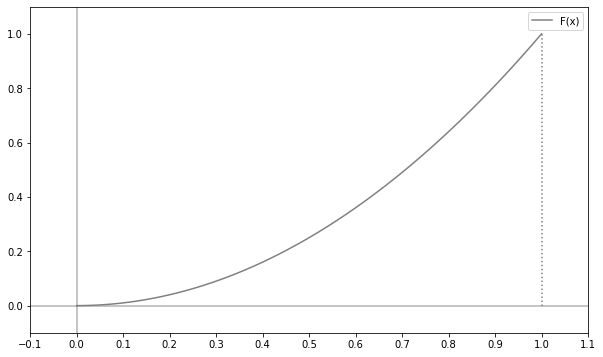

In [11]:
#分布関数F(x)を図示してみる。分布関数は必ず単調増加関数になる。

xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

In [12]:
#確率変数の変換
#確率変数の変換を考える。例として、ルーレットの出た値を2倍して3を加えた2X+3を使う。これをYとするとYもまた連続型の確率変数になっている。
#Yの密度関数をg(y)とすると
    #g(y)=(y-3)/2 (3<x<5)
    #g(y)=0
#分布関数はG(y)とする
    #G(y)=P(Y<y)=g(y)定積分(yから-∞)

y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y-3)/2
    else:
        return 0

def G(y):
    return integrate.quad(g, -np.inf, y)[0]

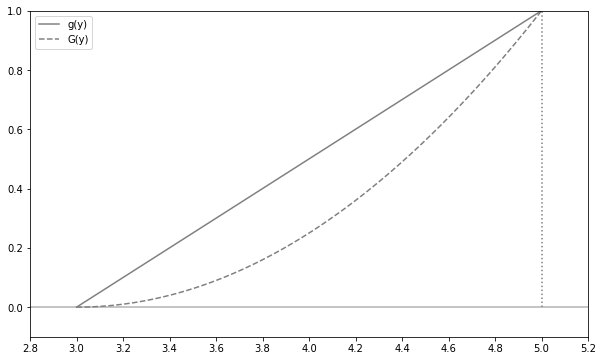

In [14]:
#密度関数g(y)と分布関数G(y)を同時に図示する

ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys], label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys], label='G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1,1)
ax.legend()

plt.show()